In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## House Sales Dataset

This final project studies the house sales dataset.<br>


This dataset contains details of house sales in neighborhoods of King County, Washington. <br>
It includes data for houses sold between May 2014 and May 2015.  <br>
<br>
Origin: Kaggle<br>
File Type: CSV<br>
File Size: 2.5 MB<br>
Modeling Problem: Regression<br>
Missing Values: Yes<br>
<br>
<br>
Attributes:<br>
id - a numerical identity field for each house sale<br>
date - date when the house is sold<br>
price - house sale price amount in US dollars (dependent variable)<br>
bedrooms - number of bedrooms in the house<br>
bathrooms - number of bathrooms in the house<br>
sqft_living - living area in square feet<br>
sqft_lot - total lot area in square feet<br>
floors - number of floors in the house<br>
waterfront - binary field, 1 if the house has a waterfront, 0 for no waterfront<br>
view - binary field, 1 if the house has a view, 0 for no view<br>
condition - a number denoting the condition of the house<br>
grade - a number denoting the grade of the house<br>
sqft_basement - area in square feet if the house has a basement<br>
yr_built - in which year is the house built<br>
yr_renovated - year when a house is renovated, 0 if not renovated<br>
zipcode - house location zipcode in the county<br>
lat - latitude cooridnate <br>
long - longitude coordinate



#### Data preprocessing

In [1]:
houseSales = pd.read_csv('house_sales.csv')
houseSales.head()

NameError: ignored

In [ ]:
n_rows, n_col = houseSales.shape
print(f"House dataset has {n_rows} observations.")

House dataset has 21613 observations.


The following command helps us have an overview of the type of data we have available. We have 21 columns and 21613 observations. We use this to know what kind of processing we might need to do. For example, the date column as a type object, therefore we will not do numerical operations on this column without prior transformation. Other columns are either of continuous type (float64) or discrete (int64).

A useful information to extract is that continuous variables should be categorical variables, which we can double check using the dataset documentation (readme file).

In [ ]:
houseSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       20479 non-null  float64
 4   bathrooms      20545 non-null  float64
 5   sqft_living    20503 non-null  float64
 6   sqft_lot       20569 non-null  float64
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

The following gives us the columns that have at least 1 missing value. We will have to address those by either replacing missing values or ignoring them and removing them from the dataset.

In [ ]:
houseSales.columns[houseSales.isnull().sum()> 0]

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot'], dtype='object')

In [ ]:
lossDropna = 1 - houseSales.dropna().shape[0] / houseSales.shape[0]
print(f"If we ignore observations with at least 1 missing value, we lose {round(100*lossDropna, 2)}% of data.")

If we ignore observations with at least 1 missing value, we lose 18.48% of data.


4 variables have missing values : 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot'. Since ignoring observation with missing data results in a loss of almost 20/% of the data, we will rather replace missing values. We will look at the distribution of the 4 concerned variables to decide how.

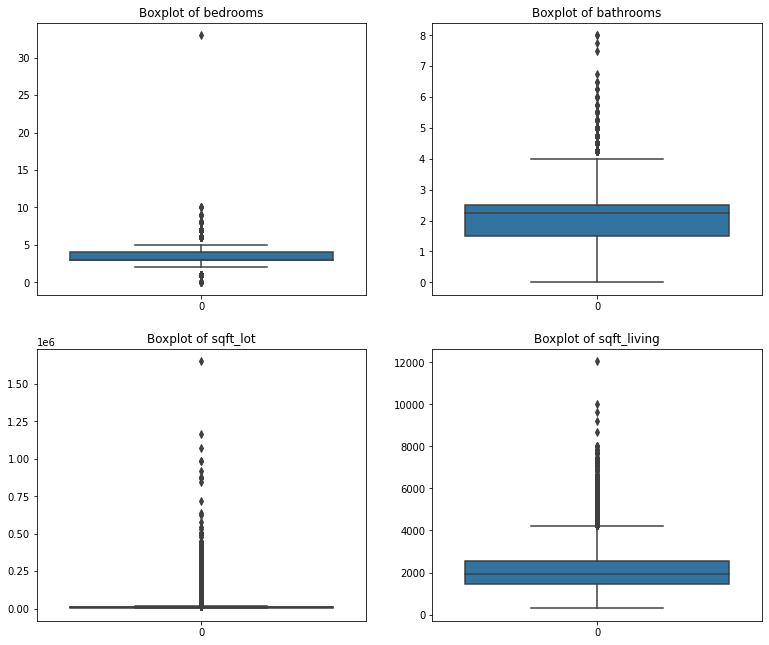

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(13, 11))
sns.boxplot(ax=axes[0, 1], data=houseSales["bathrooms"]);
axes[0, 1].set_title("Boxplot of bathrooms")
sns.boxplot(ax=axes[0, 0], data=houseSales["bedrooms"]);
axes[0, 0].set_title("Boxplot of bedrooms")
sns.boxplot(ax=axes[1, 1], data=houseSales["sqft_living"]);
axes[1, 1].set_title("Boxplot of sqft_living")
sns.boxplot(ax=axes[1, 0], data=houseSales["sqft_lot"]);
axes[1, 0].set_title("Boxplot of sqft_lot")
plt.show()

Given the distributions above, we expect that the mean of these variables will be distorted by the presence of outliers, in particular for sqft_lot. Therefore we will replace missing values by the median.

In [ ]:
houseSales['bedrooms'].fillna(houseSales['bedrooms'].median(), inplace=True)
houseSales['bathrooms'].fillna(houseSales['bathrooms'].median(), inplace=True)
houseSales['sqft_living'].fillna(houseSales['sqft_living'].median(), inplace=True)
houseSales['sqft_lot'].fillna(houseSales['sqft_lot'].median(), inplace=True)

##### Data Transformation and Feature creation

As noted previously, the variable date is of type object and needs to be processed, we use pandas to transform it into a date object.

In [ ]:
houseSales['date'] = pd.to_datetime(houseSales['date']) # set to appropriate type

yr_renovated is equal to the year during the house was renovated and 0 if the house was never renovated. We transform it into a binary variable indicating if the house was renovated.

In [ ]:
houseSales['isRenovated'] = 1 * (houseSales['yr_renovated'] > 0)

Using the construction date of the house, we create a variable giving the age of the house in years.

In [ ]:
houseSales['houseAge'] = 2015 - houseSales['date'].apply(lambda x:x.year)
#Data contains house sales between 2014 and 2015, so we proxy the age of the house by 2015 - year of construction

We check the number of different values for grade and condition which are both categorical. The number of different values is not too big and therefore we do not process it more. If it had been very large, we would have processed it to avoid building an unstable model: indeed a very large number of variables can cause a model to be unstable.

In [ ]:
houseSales['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1])

In [ ]:
houseSales['condition'].unique()

array([3, 5, 4, 1, 2])

A zipcode is made of 5 digits and corresponds to a geographical area, since there is a large number of zipcode we process it to reduce the number of different values.
Considering the first 4 digits of a zipcode also gives a geographical area, but larger than the original one. We call this variable zip4.

In [ ]:
houseSales['zip4']=houseSales['zipcode'].apply(
    lambda x:str(x)[:4]) #reduce the number of different zip by look at zip4 granularity - this avoids having
# too many categorical values for this variable

##### Visualization and pattern discovery

The following figures help visualizing the relationship between categorical variables and the price of the house.

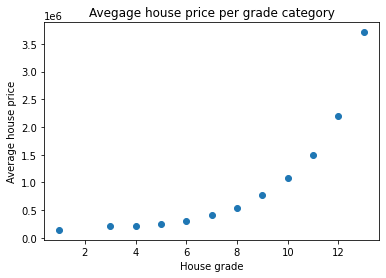

In [ ]:
pricePerGrade = houseSales.groupby('grade').mean()['price']
plt.scatter(x=pricePerGrade.index, y=pricePerGrade)
plt.xlabel("House grade")
plt.ylabel("Average house price")
plt.title("Avegage house price per grade category");

There is a clear exponential relationship between the price and the grade.

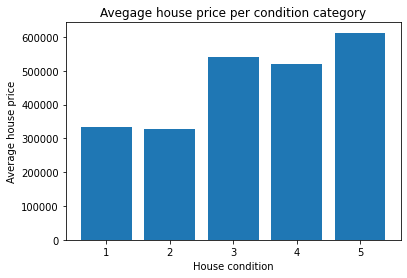

In [ ]:
pricePerCondition = houseSales.groupby('condition').mean()['price']
plt.bar(x=pricePerCondition.index, height=pricePerCondition)
plt.xlabel("House condition")
plt.ylabel("Average house price")
plt.title("Avegage house price per condition category");

The condition of house also seems to impact average price, however less than the grade.

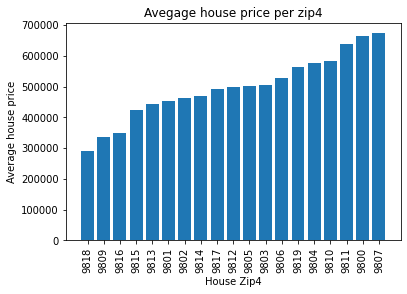

In [ ]:
pricePerZip4 = houseSales.groupby('zip4').mean()['price'].sort_values()
plt.bar(x=pricePerZip4.index, height=pricePerZip4)
plt.xticks([i for i in range(len(pricePerZip4.index))], pricePerZip4.index, rotation=90)
plt.xlabel("House Zip4")
plt.ylabel("Average house price")
plt.title("Avegage house price per zip4");

Clearly some areas are more expensive than others, we can see it at the zip4 level.

For quantitative variables, we can look at the correlation matrix and then focus on the correlation with price.

In [ ]:
corr = houseSales[['bedrooms',
                   'bathrooms',
                   'sqft_living',
                   'sqft_lot',
                   'isRenovated',
                   'houseAge',
                   'floors',
                   'waterfront',
                   'view',
                   'sqft_basement',
                   'price']].corr()

The followring figure is a visual representation of the correlation between different quantitative variables. The value of the correlation is given by color of the cells.

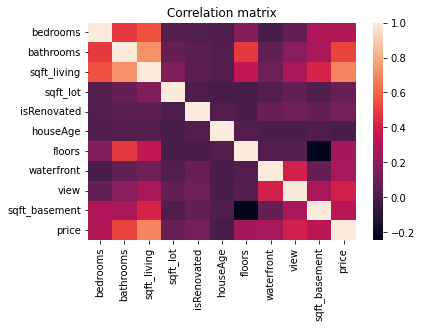

In [ ]:
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.title("Correlation matrix");

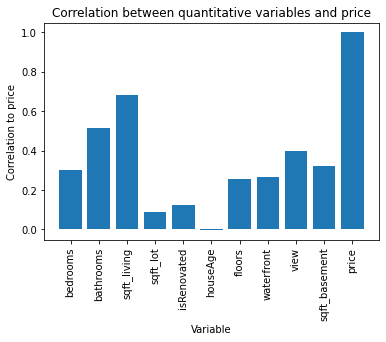

In [ ]:
plt.bar(x= corr.columns, height=corr.price)
plt.xticks(list(range(corr.shape[0])), corr.index, rotation=90)
plt.ylabel("Correlation to price")
plt.xlabel("Variable")
plt.title("Correlation between quantitative variables and price");

sqft_living seems to be the most correlated quantitative variable. The age of the house does not seem to be relevant, however it might be when combined with other variables, we will see that when building our regression model.

#### Regression model

Our dependent variable is price, and our explanatory variables are: <br> <br>
bedrooms: quantitative <br>
bathrooms: quantitative <br>
sqft_living: quantitative <br>
sqft_lot: quantitative <br>
isRenovated: quantitative <br>
houseAge: quantitative <br>
floors: quantitative <br>
waterfront: quantitative <br>
view: quantitative <br>
sqft_basement: quantitative <br>
zip4: categorical <br>
condition: categorical <br>
grade: categorical <br><br>


We decide to use a regression decision tree to predict price as function of our explanatory variables. Since this model is able to handle categorical features, we will not process categorical data further (e.g. with one hot encoding).

In [ ]:
# pip install sklearn

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

We split the data into two parts: <br>
1. X: it contains all of the variables used to predict the price
2. y: it contains the price of the houses

In [ ]:
X = houseSales[['bedrooms',
                   'bathrooms',
                   'sqft_living',
                   'sqft_lot',
                   'isRenovated',
                   'houseAge',
                   'floors',
                   'waterfront',
                   'view',
                   'sqft_basement',
                   'zip4', 'condition', 'grade']]
y = houseSales.price

###### Creation of training and testing set

We split our data into two sets: <br>

1. Trainset (X_train, y_train): This is the part of the data that we will use to train our model.
2. Testset (X_test, y_train): This part of the date is used to measure the quality of our model.
<br>

We use the function train_test_split to do that, and choose to put 30\% of the data into the test set.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=0)

###### Training the model

Here we choose to train a DecisionTreeRegressor model from library sklearn.

Since this model has parameters, we use the function GridSearchCV to try out different parameters (for the parameters max_depth and min_samples_split) and select the best ones.

The data used here is only the trainset.

In [ ]:
regressor = DecisionTreeRegressor(random_state=0)
parameters = {'max_depth': [3, 5, 7, 9, 10, 15, 20],
              'min_samples_split': [2, 4, 10, 20, 30, 50]}
model = GridSearchCV(regressor, parameters)
model.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [3, 5, 7, 9, 10, 15, 20],
                         'min_samples_split': [2, 4, 10, 20, 30, 50]})

###### Testing the model

Now the model is trained, we use the predict function to predict house prices using the variables.

We evaluate the quality of the model on the test set and also on the training set for comparison.

In [ ]:
predictTrain = model.predict(X_train)
predictTest = model.predict(X_test)
print(f"MSE train: {mean_squared_error(y_train, predictTrain)} | MSE test: {mean_squared_error(y_test, predictTest)}")
print(f"MAE train: {mean_absolute_error(y_train, predictTrain)} | MAE test: {mean_absolute_error(y_test, predictTest)}")
print(f"R squared train: {r2_score(y_train, predictTrain)} | R squared test: {r2_score(y_test, predictTest)}")


MSE train: 30704024441.115074 | MSE test: 43856129814.1639
MAE train: 109294.26409031109 | MAE test: 127414.54418630154
R squared train: 0.7703462284471022 | R squared test: 0.6805629951987086


Our selected model performs relatively well being able to explain 68/% of the variance in the data on the testing sample. However the better performance on the training set signals there is still some overfitting which may be addressed by using more regularization in the model of by gathering more data.

The two following figure represent the predicted values against the actual values and provide a visual way to assess the model quality. With a perfect model, every blue point would be on the red line. The further away from the red line they are, the bigger the error is.

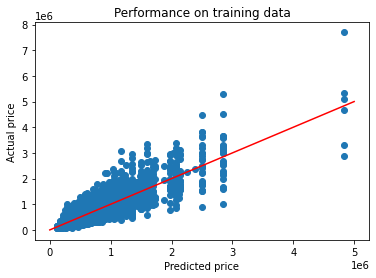

In [ ]:
plt.scatter(predictTrain, y_train)
plt.plot([0,5e6], [0,5e6], color='r')
plt.xlabel("Predicted price")
plt.ylabel("Actual price")
plt.title("Performance on training data");

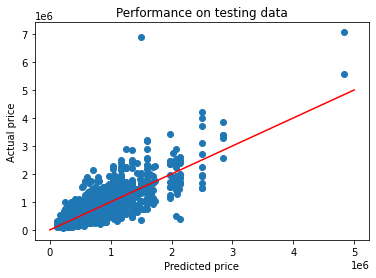

In [ ]:
plt.scatter(predictTest, y_test)
plt.plot([0,5e6], [0,5e6], color='r')
plt.xlabel("Predicted price")
plt.ylabel("Actual price")
plt.title("Performance on testing data");

### Conclusion

We have performed some exploratory analysis on the house sales dataset and built a regression model to predict price of the houses. Our proposed model could still be improved as the result show, it indeeds suffers from overfitting. Further exploration could consist in using different, more complex models.